In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter, PercentFormatter
import adjustText

In [30]:
df = pd.read_csv('bat_lead_20200922.csv')

In [31]:
df.head()

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,OBP,SLG,wOBA,wRC+,EV,BsR,Off,Def,WAR,playerid
0,Jose Ramirez,Indians,52,229,16,41,41,10,11.8%,17.5%,...,0.376,0.595,0.406,156,88.5,2.6,18.5,2.6,3.0,13510
1,Fernando Tatis Jr.,Padres,54,240,15,47,41,10,10.4%,23.8%,...,0.367,0.565,0.391,148,95.7,2.3,17.0,4.2,2.9,19709
2,Freddie Freeman,Braves,54,237,11,45,48,1,17.3%,14.8%,...,0.460,0.624,0.450,183,92.4,0.5,25.6,-1.9,2.9,5361
3,Jose Abreu,White Sox,54,236,18,40,55,0,5.9%,22.0%,...,0.381,0.644,0.428,178,92.5,0.5,23.1,-5.8,2.7,15676
4,Manny Machado,Padres,54,234,16,42,46,6,9.8%,14.1%,...,0.376,0.604,0.402,156,90.7,-1.1,15.5,3.2,2.7,11493


In [32]:
df = df.query('PA >= 160').copy()

In [33]:
# clean bb%
df['bb_pct'] = df['BB%'].str.replace('%','').astype('float64') / 100
df['player'] = df['Name']

In [76]:
plt.xkcd()

CPU times: user 1min 22s, sys: 662 ms, total: 1min 22s
Wall time: 1min 22s


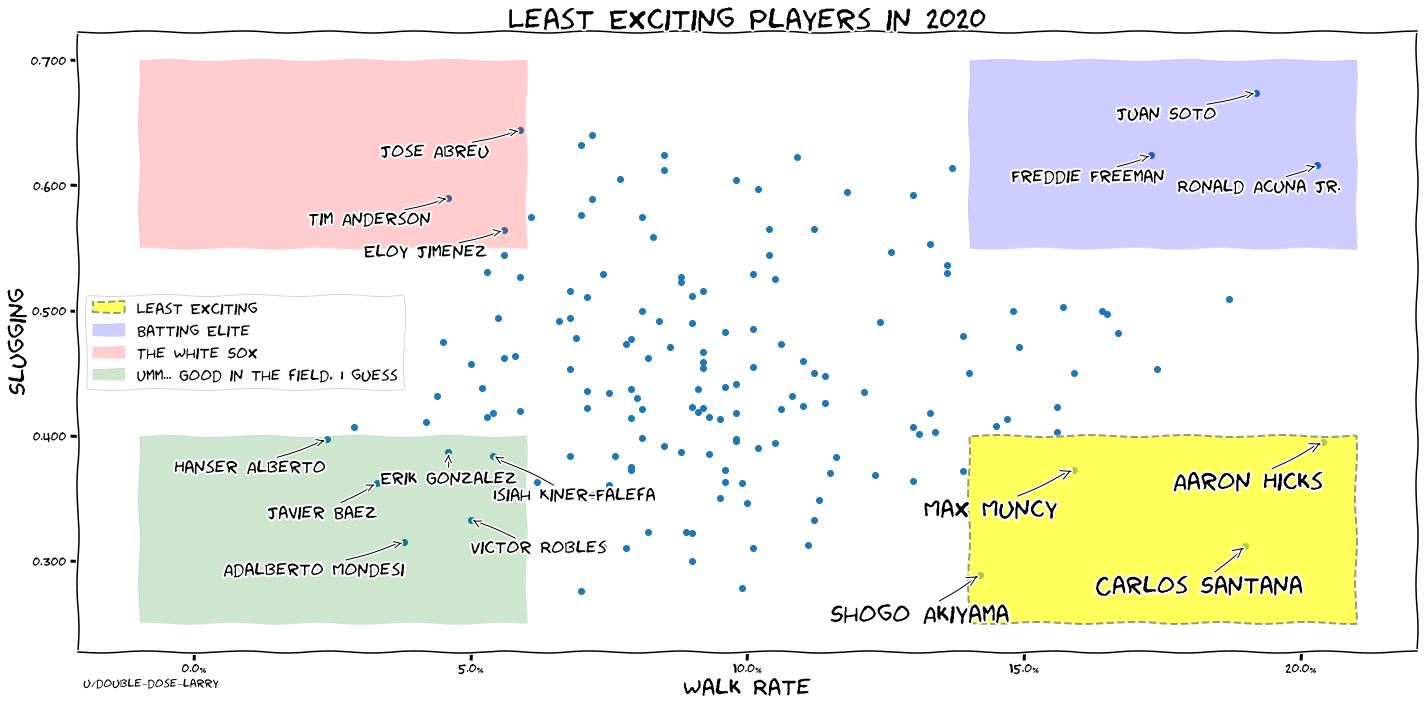

In [137]:
%%time
fig, ax = plt.subplots(figsize=(20,10))

# add least_exciting patch
ax.add_patch(Rectangle(
    (0.14,0.25),
    width=.07,
    height=.15,
    alpha=.4,
    ec='k', ls='--', lw=2,
    color='yellow', label="Least Exciting")
)


# plot scatter
ax.scatter(df['bb_pct'], df['SLG'])

#boring df
least_exciting = df.query('bb_pct > 0.14 and SLG < .4')
most_valuable = df.query('bb_pct > 0.14 and SLG > .55')
least_valuable = df.query('bb_pct < 0.06 and SLG < .4')
who_needs_walks = df.query('bb_pct < 0.06 and SLG > .55')

# boring text
text_else = [
    ax.annotate(
        plr.player,
        (plr.bb_pct, plr.SLG),
        size=18,
        xytext = (-140,-25),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
    )
    for plr in pd.concat([most_valuable,who_needs_walks]).itertuples()
]

text_least = [
    ax.annotate(
        plr.player,
        (plr.bb_pct, plr.SLG),
        size=18,
        xytext = (0,-35),
        textcoords="offset pixels"
        ,arrowprops=dict(arrowstyle="->")

    )
    for plr in least_valuable.itertuples()
]

text_boring = [
    ax.annotate(
        plr.player,
        (plr.bb_pct, plr.SLG),
        size=25,
        xytext = (-150,-45),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
    )
    for plr in least_exciting.itertuples()
]


# add MVP... patch
ax.add_patch(Rectangle(
    (0.14,0.55),
    width=.07,
    height=.15,
    alpha=.1,
    color='blue', label="Batting Elite")
)

# add who needs walks patch
ax.add_patch(Rectangle(
    (0.06,0.55),
    width=-.07,
    height=.15,
    alpha=.1,
    color='red', label="The White Sox")
)

# add Umm... patch
ax.add_patch(Rectangle(
    (0.06,0.25),
    width=-.07,
    height=.15,
    alpha=.1,
    color='green', label="Umm... Good in the field, I guess")
)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.xaxis.set_major_formatter(PercentFormatter(1))
# adjustText.adjust_text(text_else)
adjustText.adjust_text(text_least)

plt.legend(prop={'size': 16})
plt.xlabel('Walk Rate',size=24)

plt.ylabel('Slugging', size=24)
plt.title('Least Exciting Players in 2020', size=30)
plt.text(-.02,.20,'u/double_dose_larry', size=12)
plt.tight_layout()
plt.savefig('least_exciting.png')

In [23]:
next(boring.itertuples())

Pandas(Index=95, Name='Aaron Hicks', Team='Yankees', G=48, PA=186, HR=5, R=23, RBI=14, SB=2, _9='20.4%', _10='17.7%', ISO=0.177, BABIP=0.248, AVG=0.218, OBP=0.382, SLG=0.395, wOBA=0.34700000000000003, _17=121, EV=87.3, BsR=1.8, Off=6.6, Def=-1.8, WAR=0.9, playerid=5297, bb_pct=0.204, player='Aaron Hicks')